In [ ]:
# preamble to be able to run notebooks in Jupyter and Colab
try:
    from google.colab import drive
    import sys
    
    drive.mount('/content/drive')
    notes_home = "/content/drive/My Drive/csc310/"
    user_home = "/content/drive/My Drive/"
    
    sys.path.insert(1,notes_home) # let the notebook access the notes folder

except ModuleNotFoundError:
    notes_home = "" # running native Jupyter environment -- notes home is the same as the notebook
    user_home = ""  # under Jupyter we assume the user directory is the same as the notebook

Mounted at /content/drive


In [ ]:
import pandas as pd
from sklearn import tree
from treeviz import tree_print

##**The Data:**

In [ ]:
penguins = pd.read_csv(notes_home+"penguins.csv")
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181,3750,male
1,Adelie,Torgersen,39.5,17.4,186,3800,female
2,Adelie,Torgersen,40.3,18.0,195,3250,female
3,Adelie,Torgersen,36.7,19.3,193,3450,female
4,Adelie,Torgersen,39.3,20.6,190,3650,male
...,...,...,...,...,...,...,...
328,Chinstrap,Dream,55.8,19.8,207,4000,male
329,Chinstrap,Dream,43.5,18.1,202,3400,female
330,Chinstrap,Dream,49.6,18.2,193,3775,male
331,Chinstrap,Dream,50.8,19.0,210,4100,male


## **Preliminary data analysis:**

In [ ]:
penguins.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057
std,5.468668,1.969235,14.015765,805.215802
min,32.100000,13.100000,172.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.500000,17.300000,197.000000,4050.000000
75%,48.600000,18.700000,213.000000,4775.000000
max,59.600000,21.500000,231.000000,6300.000000


In [ ]:
penguins.island.value_counts()

Biscoe       163
Dream        123
Torgersen     47
Name: island, dtype: int64

In [ ]:
penguins.sex.value_counts()

male      168
female    165
Name: sex, dtype: int64

In [ ]:
penguins.species.value_counts()

Adelie       146
Gentoo       119
Chinstrap     68
Name: species, dtype: int64

In [ ]:
penguins.count()

species              333
island               333
bill_length_mm       333
bill_depth_mm        333
flipper_length_mm    333
body_mass_g          333
sex                  333
dtype: int64

##**Data Description:**

This is a complete dataset about 333 penguins that were tagged and measured. The data set contains species of penguin,what island they are from, bill length in millimeters, bill depth in millimeters, flipper length in millimeters, body mass in grams and penguin sex. The species of penguins in this data set include 68 Chinstrap,146 Adelie, and  119 Gentoo. The islands these birds were tagged include 123 from Dream, 163 from Biscoe and 47 from Torgersen. Out of these 333 birds, 168 were male and 165 were female.

###**Visualization:**

##**Histograms:**

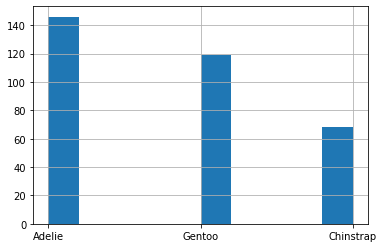

In [ ]:
penguins.species.hist()

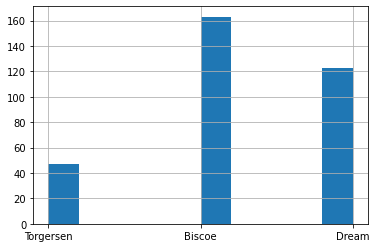

In [ ]:
penguins.island.hist()

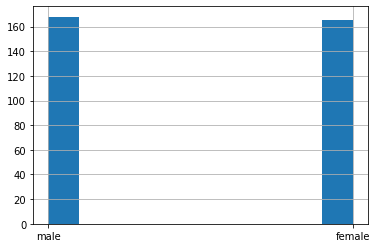

In [ ]:
penguins.sex.hist()

##**Boxplots:**

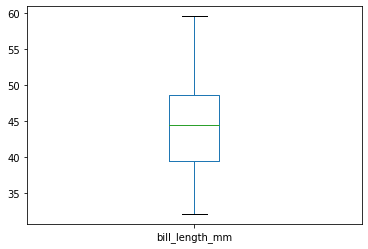

In [ ]:
penguins.bill_length_mm.plot.box()

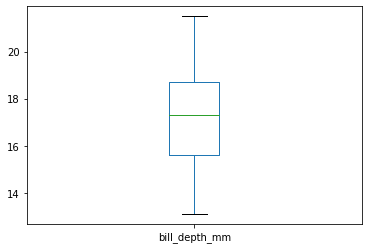

In [ ]:
penguins.bill_depth_mm.plot.box()

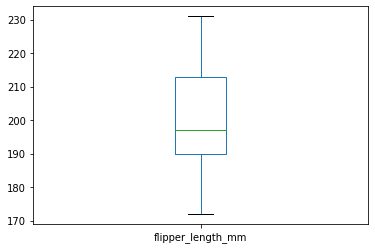

In [ ]:
penguins.flipper_length_mm.plot.box()

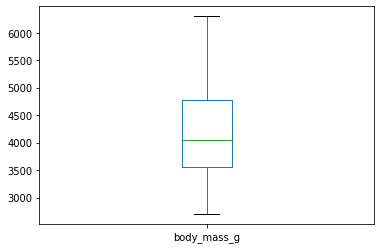

In [ ]:
penguins.body_mass_g.plot.box()

##**Species Scatter Data:**

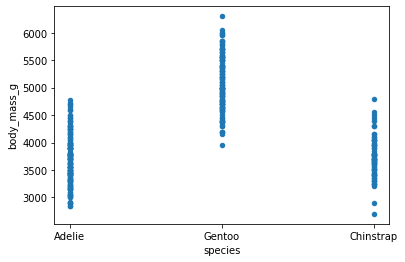

In [ ]:
penguins.plot.scatter("species","body_mass_g")

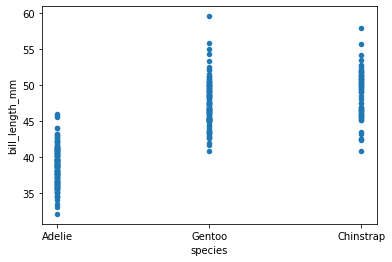

In [ ]:
penguins.plot.scatter("species","bill_length_mm")

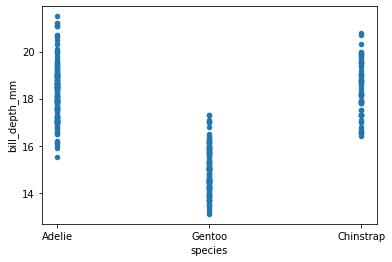

In [ ]:
penguins.plot.scatter("species","bill_depth_mm")

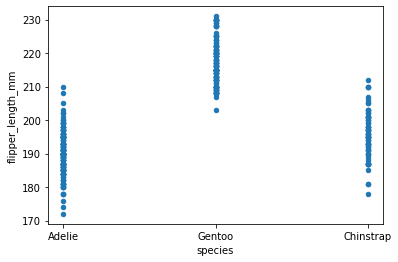

In [ ]:
penguins.plot.scatter("species","flipper_length_mm")

##**Island Scatter Data:**

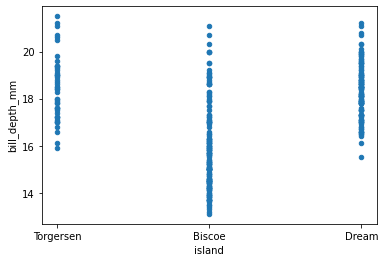

In [ ]:
penguins.plot.scatter("island","bill_depth_mm")

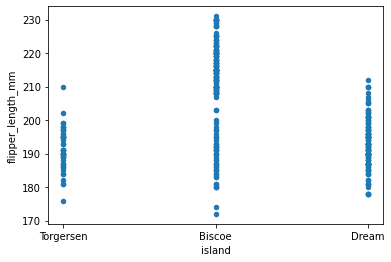

In [ ]:
penguins.plot.scatter("island","flipper_length_mm")

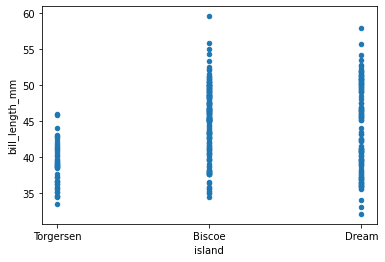

In [ ]:
penguins.plot.scatter("island","bill_length_mm")

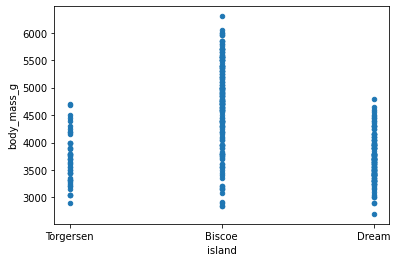

In [ ]:
penguins.plot.scatter("island","body_mass_g")

##**Unrestricted Model:**

In [ ]:
features_penguins = penguins.drop(['species','island','sex'],axis=1)
features_penguins.head()

NameError: ignored

In [ ]:
target_penguins = pd.DataFrame(penguins['species'])
target_penguins.head()

NameError: ignored

In [ ]:
dtree = tree.DecisionTreeClassifier(criterion='entropy')

In [ ]:
dtree.fit(features_penguins,target_penguins)

In [ ]:
tree_print(dtree,features_penguins)

In [ ]:
predict_array = dtree.predict(features_penguins)      # produces an array of labels
predicted_labels = pd.DataFrame(predict_array)  # turn it into a DF
predicted_labels.columns = ['species']  
predicted_labels.head()

In [ ]:
predicted_labels.equals(target_penguins)

In [ ]:
from sklearn.metrics import accuracy_score
print("Our model accuracy is: {}".format(accuracy_score(target_penguins, predicted_labels)))

##**Regulated Models:**

In [ ]:
# set up our sklearn data shape for the penguin data
from sklearn.model_selection import train_test_split
penguins2 = pd.read_csv(notes_home+"penguins.csv")
X  = penguins2.drop(['species','island','sex'],axis=1)
y = penguins2['species']

# split the data - 70% training 30% testing
datasets = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=2)
X_train, X_test, y_train, y_test = datasets

##**Low:**

In [ ]:
# set up the tree model object - limit the complexity to put us somewhere in the middle of the graph.
model = tree.DecisionTreeClassifier(criterion='entropy', max_depth=1)

# fit the model on the training set of data
model.fit(X_train, y_train)
tree_print(model,X)

# Train results: evaluate the model on the testing set of data
y_train_model = model.predict(X_train)
print("Train Accuracy: {:3.2f}".format(accuracy_score(y_train, y_train_model)))

# Test results: evaluate the model on the testing set of data
y_test_model = model.predict(X_test)
print("Test Accuracy: {:3.2f}".format(accuracy_score(y_test, y_test_model)))

if flipper_length_mm =< 206.0: 
  |then Adelie
  |else Gentoo
<->
Tree Depth:  1
Train Accuracy: 0.78
Test Accuracy: 0.80


##**Medium:**

In [ ]:
# set up the tree model object - limit the complexity to put us somewhere in the middle of the graph.
model = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)

# fit the model on the training set of data
model.fit(X_train, y_train)
tree_print(model,X)

# Train results: evaluate the model on the testing set of data
y_train_model = model.predict(X_train)
print("Train Accuracy: {:3.2f}".format(accuracy_score(y_train, y_train_model)))

# Test results: evaluate the model on the testing set of data
y_test_model = model.predict(X_test)
print("Test Accuracy: {:3.2f}".format(accuracy_score(y_test, y_test_model)))

if flipper_length_mm =< 206.0: 
  |then if bill_length_mm =< 42.35000038146973: 
  |  |then if bill_depth_mm =< 16.699999809265137: 
  |  |  |then Adelie
  |  |  |else Adelie
  |  |else if bill_length_mm =< 46.04999923706055: 
  |  |  |then Chinstrap
  |  |  |else Chinstrap
  |else if bill_depth_mm =< 17.649999618530273: 
  |  |then Gentoo
  |  |else if bill_depth_mm =< 18.75: 
  |  |  |then Adelie
  |  |  |else Chinstrap
<------->
Tree Depth:  3
Train Accuracy: 0.96
Test Accuracy: 0.96


##**High:**

In [ ]:
# set up the tree model object - limit the complexity to put us somewhere in the middle of the graph.
model = tree.DecisionTreeClassifier(criterion='entropy', max_depth=None)

# fit the model on the training set of data
model.fit(X_train, y_train)
tree_print(model,X)

# Train results: evaluate the model on the testing set of data
y_train_model = model.predict(X_train)
print("Train Accuracy: {:3.2f}".format(accuracy_score(y_train, y_train_model)))

# Test results: evaluate the model on the testing set of data
y_test_model = model.predict(X_test)
print("Test Accuracy: {:3.2f}".format(accuracy_score(y_test, y_test_model)))

if flipper_length_mm =< 206.0: 
  |then if bill_length_mm =< 42.35000038146973: 
  |  |then if bill_depth_mm =< 16.699999809265137: 
  |  |  |then if bill_length_mm =< 39.30000114440918: 
  |  |  |  |then Adelie
  |  |  |  |else Chinstrap
  |  |  |else Adelie
  |  |else if bill_length_mm =< 46.04999923706055: 
  |  |  |then if body_mass_g =< 4012.5: 
  |  |  |  |then if bill_depth_mm =< 18.65000057220459: 
  |  |  |  |  |then Chinstrap
  |  |  |  |  |else if bill_length_mm =< 44.349998474121094: 
  |  |  |  |  |  |then Adelie
  |  |  |  |  |  |else Chinstrap
  |  |  |  |else if bill_length_mm =< 45.79999923706055: 
  |  |  |  |  |then Adelie
  |  |  |  |  |else if flipper_length_mm =< 194.5: 
  |  |  |  |  |  |then Adelie
  |  |  |  |  |  |else Chinstrap
  |  |  |else if bill_depth_mm =< 15.399999618530273: 
  |  |  |  |then Gentoo
  |  |  |  |else Chinstrap
  |else if bill_depth_mm =< 17.649999618530273: 
  |  |then Gentoo
  |  |else if bill_depth_mm =< 18.75: 
  |  |  |then Adelie
  

##**Grid Search with Cross-Validation:**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

df = pd.read_csv(notes_home+"penguins.csv")
# setting up grid search using 5-fold CV
model = tree.DecisionTreeClassifier(random_state=1)
param_grid = {
    'max_depth': list(range(1,11)),
    'criterion': ['entropy', 'gini']
    }
grid = GridSearchCV(model, param_grid, cv=5)

# performing grid search 
null = grid.fit(X,y)

# print out what we found
print("Best parameters: {}".format(grid.best_params_))

# print out the best model
print("Best tree:")
tree_print(grid.best_estimator_,X)

# compute and print the accuracy
predict_y = grid.best_estimator_.predict(X)
acc = accuracy_score(y, predict_y)
print("Accuracy: {:3.2f}".format(acc))

Best parameters: {'criterion': 'entropy', 'max_depth': 4}
Best tree:
if flipper_length_mm =< 206.5: 
  |then if bill_length_mm =< 43.35000038146973: 
  |  |then if bill_length_mm =< 42.35000038146973: 
  |  |  |then if bill_depth_mm =< 16.65000057220459: 
  |  |  |  |then Adelie
  |  |  |  |else Adelie
  |  |  |else if flipper_length_mm =< 189.5: 
  |  |  |  |then Chinstrap
  |  |  |  |else Adelie
  |  |else if body_mass_g =< 4125.0: 
  |  |  |then Chinstrap
  |  |  |else if bill_length_mm =< 48.80000114440918: 
  |  |  |  |then Adelie
  |  |  |  |else Chinstrap
  |else if bill_depth_mm =< 17.649999618530273: 
  |  |then Gentoo
  |  |else if bill_depth_mm =< 18.949999809265137: 
  |  |  |then Adelie
  |  |  |else Chinstrap
<---------->
Tree Depth:  4
Accuracy: 0.99


##**Conclusion:**

Since the medium one is within the ~10% at .96, that is the model I will be using for the comparison from the unregulated data tree.

##**The unregulated set:** 

if flipper_length_mm =< 206.5:

  |then if bill_length_mm =< 43.35000038146973: 

  |  |then if bill_length_mm =< 42.35000038146973:

  |  |  |then if bill_depth_mm =< 16.65000057220459: 

  |  |  |  |then if bill_length_mm =< 39.5: 

  |  |  |  |  |then Adelie

  |  |  |  |  |else Chinstrap

  |  |  |  |else Adelie

  |  |  |else if bill_depth_mm =< 17.449999809265137:

  |  |  |  |then Chinstrap

  |  |  |  |else Adelie

  |  |else if body_mass_g =< 4125.0: 

  |  |  |then Chinstrap

  |  |  |else if bill_length_mm =< 48.80000114440918: 

  |  |  |  |then if body_mass_g =< 4612.5: 

  |  |  |  |  |then if bill_depth_mm =< 19.300000190734863: 

  |  |  |  |  |  |then if flipper_length_mm =< 196.0: 

  |  |  |  |  |  |  |then Chinstrap

  |  |  |  |  |  |  |else Adelie

  |  |  |  |  |  |else Adelie

  |  |  |  |  |else Gentoo

  |  |  |  |else Chinstrap

  |else if bill_depth_mm =< 17.649999618530273: 

  |  |then Gentoo

  |  |else if bill_length_mm =< 46.54999923706055: 

|  |  |then Adelie

  |  |  |else Chinstrap

<------------------->

Tree Depth:  7

Train Accuracy: 1.0

Test Accuracy: 1.0


##**The Medium controlled set:**

if flipper_length_mm =< 206.0: 

  |then if bill_length_mm =< 42.35000038146973: 

  |  |then if bill_depth_mm =< 16.699999809265137: 

  |  |  |then Adelie

  |  |  |else Adelie

  |  |else if bill_length_mm =< 46.04999923706055: 

  |  |  |then Chinstrap

  |  |  |else Chinstrap

  |else if bill_depth_mm =< 17.649999618530273: 

  |  |then Gentoo

  |  |else if bill_depth_mm =< 18.75: 

  |  |  |then Adelie

  |  |  |else Chinstrap

<------->

Tree Depth:  3

Train Accuracy: 0.96

Test Accuracy: 0.96

##**Conclusion:**

Even though the first tree goes down 7 layers and the medium tree goes down 3, they have almost the same training and testing accuracy. From just running all types of trees I noticed even when the tree goes down only one level the accuracy is already at 80% which is pretty high. Readability wise I prefer the second tree because it has less layers to sift through to determine what kind of penguin I am looking at, if I didn't know the species. The first model's readability although precise, is really messy with a lot of if then and else statements on each level, from that tree I would have a harder time with making a prediction. The second tree technically gives less insights or patterns because it uses less data to determine the penguin type than the first tree, only using flipper length, bill length and bill depth while the first tree also uses body mass to make a prediction.From the second tree I can interpret that if a penguin has a flipper length of less than or equal to 206mm with a bill less than or equal to 43 mm and bill depth less than or equal to 17mm, it is Adelie. If the bill is greater than 43 but less than 46mm and a bill less than 17mm then it is a Chinstrap penguin. If the bill depth is less than 18mm it is a Gentoo penguin. Finally if none of the conditions apply and the penguin has a beak that has a depth less than 18.75 it is either a Chinstrap or Adelie penguin.